Hasil Prediksi:
[0 0] -> 0
[0 1] -> 1
[1 0] -> 1
[1 1] -> 1


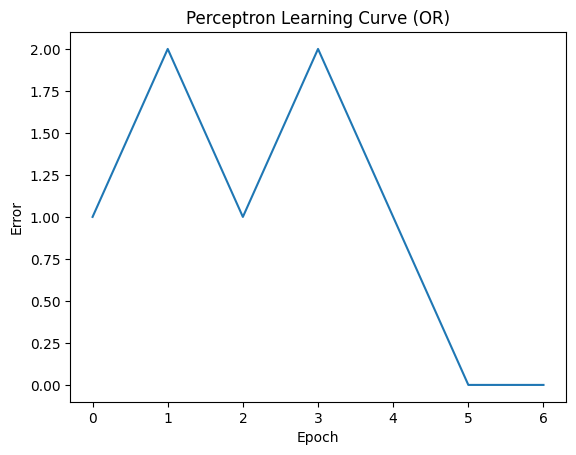

Bobot akhir: [0.07454012 0.45071431]
Bias akhir: -0.06800605818859493


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# fungsi aktivasi
def aktivasi(x, w, b):
    z = np.dot(x, w) + b
    return 1 if z >= 0 else 0

# input
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# output
y = np.array([0, 1, 1, 1])

# inisialisasi bobot dan bias secara acak
np.random.seed(42)
w = np.random.rand(2) - 0.5
b = np.random.rand() - 0.5

# pelatihan perceptron
learning_rate = 0.1
epochs = 7
errors = []
log = []

for epoch in range(epochs):
    error = 0
    for i in range(len(X)):
        x = X[i]
        target = y[i]
        net = np.dot(x, w) + b
        output = aktivasi(x, w, b)
        err = target - output

        log.append([epoch, x[0], x[1], target, w[0], w[1], net, output, err, w[0], w[1], b])

        if output != target:
            w += learning_rate * err * x
            b += learning_rate * err

            log[-1][9] = w[0]
            log[-1][10] = w[1]
            log[-1][11] = b

        if output != target:
            error += 1

    errors.append(error)

# buat dataFrame
df = pd.DataFrame(log, columns=['Epoch', 'x1', 'x2', 'Target', 'Initial w1', 'Initial w2', 'NET', 'Output', 'Error', 'Final w1', 'Final w2', 'Bias'])

# simpan dataFrame ke Excel
file_path = 'perceptron_or_final.xlsx'
df.to_excel(file_path, index=False)

# Hasil Prediksi
print("Hasil Prediksi:")
for x in X:
    output = aktivasi(x, w, b)
    print(x, "->", output)

# plot error
plt.figure()
plt.plot(range(epochs), errors)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Perceptron Learning Curve (OR)')
plt.show()

print("Bobot akhir:", w)
print("Bias akhir:", b)

